In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import math
import datetime
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [103]:
df = pd.read_csv("BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-01,387.427002,391.378998,380.779999,383.614990,383.614990,26229400
1,2014-10-02,383.988007,385.497009,372.946014,375.071991,375.071991,21777700
2,2014-10-03,375.181000,377.695007,357.859009,359.511993,359.511993,30901200
3,2014-10-04,359.891998,364.487000,325.885986,328.865997,328.865997,47236500
4,2014-10-05,328.915985,341.800995,289.295990,320.510010,320.510010,83308096


In [104]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2282,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,51287442704
2283,2020-12-31,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,46754964848
2284,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2285,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2286,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202


In [105]:
df.xs(key='Close',axis=1).max()

32782.023438

In [106]:
df.xs(key='Close',axis=1).iplot()


In [107]:
df1=df.reset_index()['Close']
df1

0         383.614990
1         375.071991
2         359.511993
3         328.865997
4         320.510010
            ...     
2282    28840.953125
2283    29001.720703
2284    29374.152344
2285    32127.267578
2286    32782.023438
Name: Close, Length: 2287, dtype: float64

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.00630329]
 [0.00604127]
 [0.00556402]
 ...
 [0.89547665]
 [0.97991788]
 [1.        ]]


In [109]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [110]:
training_size,test_size

(1600, 687)

In [111]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [112]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [113]:
print(X_train.shape), print(y_train.shape)

(1499, 100)
(1499,)


(None, None)

In [114]:
print(X_test.shape), print(y_test.shape)

(586, 100)
(586,)


(None, None)

In [115]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [117]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [118]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 [==============================] - 8s 173ms/step - loss: 0.0041 - val_loss: 0.0088
Epoch 2/100
24/24 [==============================] - 3s 119ms/step - loss: 9.6542e-04 - val_loss: 0.0039
Epoch 3/100
24/24 [==============================] - 3s 118ms/step - loss: 5.9902e-04 - val_loss: 0.0023
Epoch 4/100
24/24 [==============================] - 3s 118ms/step - loss: 4.9706e-04 - val_loss: 0.0015
Epoch 5/100
24/24 [==============================] - 3s 117ms/step - loss: 5.3437e-04 - val_loss: 0.0017
Epoch 6/100
24/24 [==============================] - 3s 118ms/step - loss: 4.7167e-04 - val_loss: 0.0018
Epoch 7/100
24/24 [==============================] - 3s 139ms/step - loss: 3.9630e-04 - val_loss: 0.0023
Epoch 8/100
24/24 [==============================] - 3s 126ms/step - loss: 3.7693e-04 - val_loss: 0.0017
Epoch 9/100
24/24 [==============================] - 3s 118ms/step - loss: 3.4864e-04 - val_loss: 0.0013
Epoch 10/100
24/24 [==============================] - 3s 11

In [120]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

19/19 [==============================] - 0s 21ms/step


In [121]:
# Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [122]:
### Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

5002.803019872762

In [123]:
math.sqrt(mean_squared_error(y_test,test_predict))

11138.024823909187

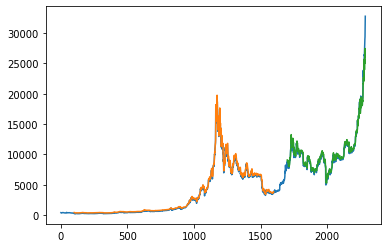

In [124]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [125]:
len(test_data)

687

In [126]:
x_input=test_data[230:].reshape(1,-1)
x_input.shape

(1, 457)

In [127]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [133]:
from numpy import array

lst_output=[]
n_steps=456
i=0
while(i<30):
    
    if(len(temp_input)>456):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.23954336 0.24744018 0.24692369 0.25817868 0.25789447 0.24977529
 0.25022919 0.24975226 0.25139871 0.24620555 0.24136434 0.24309371
 0.23908488 0.23955578 0.24671803 0.24738184 0.24230522 0.22502106
 0.22437135 0.26017108 0.27809139 0.28749953 0.27843417 0.28369547
 0.27688767 0.2766993  0.27858618 0.28053727 0.27779639 0.2832331
 0.28108351 0.2816464  0.27878422 0.26459327 0.26486014 0.27228086
 0.26314888 0.26492394 0.26469699 0.26162473 0.25499661 0.25679911
 0.25763382 0.2493928  0.24622936 0.24074298 0.22894937 0.21833186
 0.22143637 0.21070515 0.21371757 0.21593318 0.22554222 0.22343948
 0.23258371 0.22670669 0.22224902 0.21911124 0.21905472 0.21696568
 0.2229856  0.2260125  0.22629594 0.2265446  0.22153153 0.21776573
 0.21590423 0.21669269 0.21750702 0.21305937 0.21390675 0.20716458
 0.19820966 0.21772534 0.21545695 0.21594683 0.21509854 0.2249265
 0.22014302 0.21912792 0.21767483 0.21656487 0.21813283 0.21898861
 0.22219873 0.21822198 0.21517339 0.21537506 0.20878

In [134]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [135]:
len(df1)

2287

ValueError: x and y must have same first dimension, but have shapes (100,) and (1831, 1)

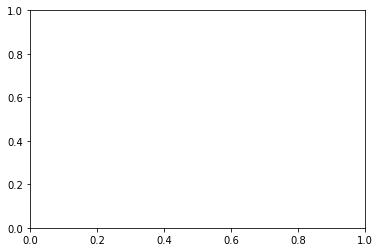

In [144]:
plt.plot(day_new,scaler.inverse_transform(df1[456:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [140]:
df3=scaler.inverse_transform(df1).tolist()

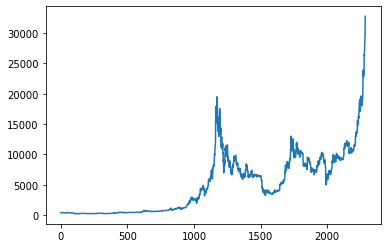

In [141]:
plt.plot(df3)